In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [130]:
data=pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
data1=data.drop(['Name','Cabin','Ticket'],axis=1)

data1_final=pd.get_dummies(data1,drop_first=True)
data1_final

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [132]:
data1_final.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [133]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [134]:
data1_final['Age'] = data1_final[['Age','Pclass']].apply(impute_age,axis=1)
data1_final

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [135]:
x=data1_final.drop(['Survived',],axis=1)
y=data1_final['Survived']
y.isna().sum()

0

# Feature selection

In [136]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 



In [137]:
featur_selection=SelectKBest(score_func=chi2,k=5)
featur_selection
fit = featur_selection.fit(x,y)

In [138]:
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)
features=pd.concat([column,score],axis=1)
features.columns=['spec','score']
features

,spec,score
0,PassengerId,3.312934
1,Pclass,30.873699
2,Age,11.993893
3,SibSp,2.581865
4,Parch,10.097499
5,Fare,4518.319091
6,Sex_male,92.702447
7,Embarked_Q,0.010847
8,Embarked_S,5.984840


In [139]:
print(features.nlargest(9,'score'))

          spec        score
5         Fare  4518.319091
6     Sex_male    92.702447
1       Pclass    30.873699
2          Age    11.993893
4        Parch    10.097499
8   Embarked_S     5.984840
0  PassengerId     3.312934
3        SibSp     2.581865
7   Embarked_Q     0.010847


# Feature importance

In [140]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

C:\Users\mpavithr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [141]:
print(model.feature_importances_)

[0.17057304 0.09972129 0.17110815 0.03906833 0.04104434 0.1708665
 0.27411614 0.01281237 0.02068983]


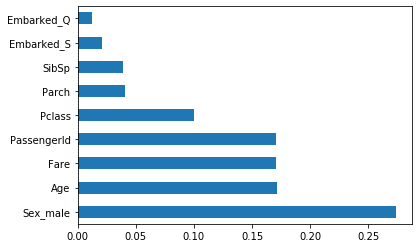

In [142]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

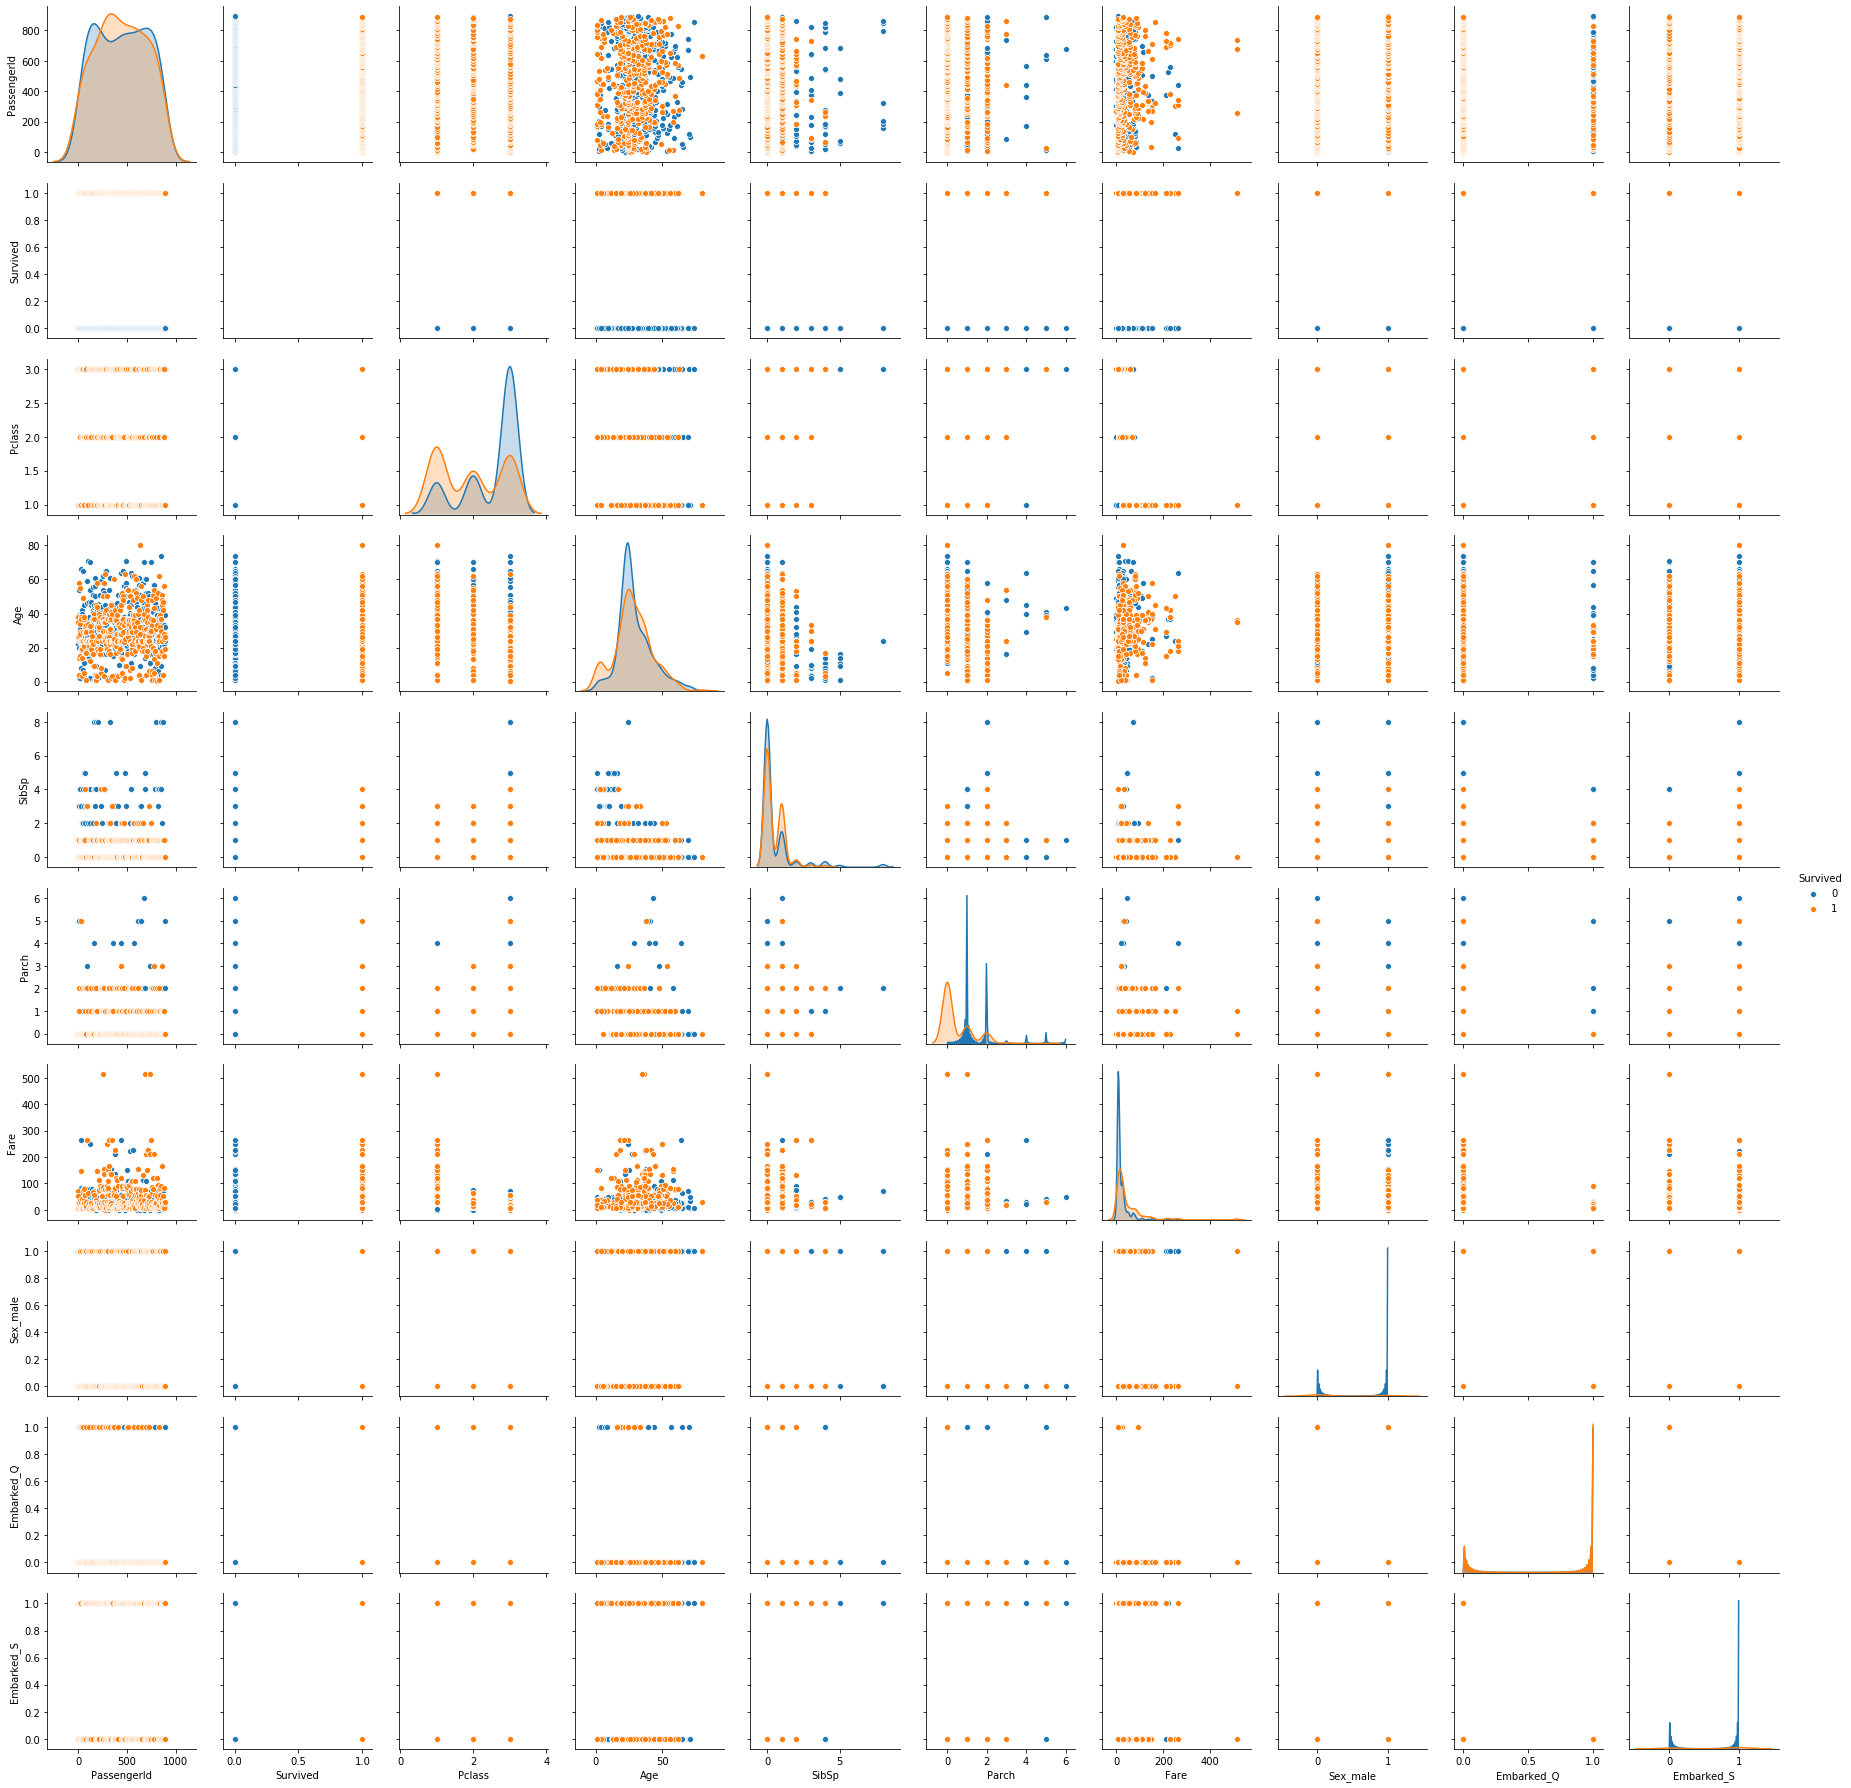

In [145]:
sns.pairplot(data1_final,hue='Survived')

# train test split

In [146]:
x.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [147]:
x[['PassengerId', 'Pclass', 'Age', 'Parch', 'Fare', 'Sex_male','Embarked_S']]

,PassengerId,Pclass,Age,Parch,Fare,Sex_male,Embarked_S
0,1,3,22.0,0,7.2500,1,1
1,2,1,38.0,0,71.2833,0,0
2,3,3,26.0,0,7.9250,0,1
3,4,1,35.0,0,53.1000,0,1
4,5,3,35.0,0,8.0500,1,1
...,...,...,...,...,...,...,...
886,887,2,27.0,0,13.0000,1,1
887,888,1,19.0,0,30.0000,0,1
888,889,3,24.0,2,23.4500,0,1
889,890,1,26.0,0,30.0000,1,0


In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x[['PassengerId', 'Pclass', 'Age', 'Parch', 'Fare', 'Sex_male','Embarked_S']],y, test_size=0.30)

# Decison Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
DT_predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,DT_predictions))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       165
           1       0.65      0.71      0.68       103

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, DT_predictions)

0.7388059701492538

In [151]:
print(confusion_matrix(Y_test,DT_predictions))

[[125  40]
 [ 30  73]]


# Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [153]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test,rfc_pred))
print(classification_report(Y_test,rfc_pred))

[[142  23]
 [ 30  73]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       165
           1       0.76      0.71      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, rfc_pred)

0.8022388059701493

In [156]:
#auc curve:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
 
auc = roc_auc_score(Y_test, rfc_pred)
print('AUC: %.2f' % auc)

AUC: 0.78


# XGBoost

In [157]:
# importing required libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

model = XGBClassifier()

# fit the model with the training data
model.fit(X_train,Y_train)

print(model.feature_importances_)

[15:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.03690673 0.22036144 0.04759928 0.02673949 0.05153183 0.58180386
 0.03505743]


C:\Users\mpavithr\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [158]:

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(Y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)



Target on train data [0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0
 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 

C:\Users\mpavithr\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [159]:

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(Y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data [0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 1 0 1 1 0 0 0 1]

accuracy_score on test dataset :  0.7798507462686567


In [160]:

print(confusion_matrix(Y_test,predict_test))
print(classification_report(Y_test,predict_test))

[[136  29]
 [ 30  73]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       165
           1       0.72      0.71      0.71       103

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [161]:
auc = roc_auc_score(Y_test, predict_test)
print('AUC: %.2f' % auc)

AUC: 0.77
